### Goal is to understand

1 .The typical dates when students submit assignments

2 .The typical times (hour of the day) of submissions

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("grades.csv")
df.shape

(198, 2)

In [102]:
df

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49
...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06


In [103]:
import datetime

In [104]:
df["submit_time"] = pd.to_datetime(df["submit_time"], infer_datetime_format=True)

In [105]:
df["date"] = df["submit_time"].apply(lambda x : x.date())
df["time"] = df["submit_time"].apply(lambda x : x.time())

##### What percentage of students submitted their solutions in .zip format?

In [106]:
df["file_type"] = df["submission"].apply(lambda x : x.split(".")[-1])
df["file_type"].value_counts()

zip    189
R        7
7z       2
Name: file_type, dtype: int64

In [107]:
print(189/df.shape[0])

0.9545454545454546


In [108]:
# Another way
url = df["submission"]
count = url.str.count("zip") 

In [109]:
from functools import reduce
print(reduce(lambda x, y : x + y if x > 0 else x + 0 , count))

189


### How many students submitted the assignment after the first deadline (including the students who submitted after the second deadline) ?

In [110]:
submission_first = "01/03/17-23:59:59"
submission_first = pd.to_datetime(submission_first, infer_datetime_format=True).date()

submission_last = "01/09/17-22:59:00"
submission_last = pd.to_datetime(submission_last, infer_datetime_format=True).date()

print(submission_first)
print(submission_last)

2017-01-03
2017-01-09


In [122]:
df["is_late"] = (df["date"] > submission_first)
df["is_late"].value_counts()

False    154
True      44
Name: is_late, dtype: int64

In [123]:
#Another Way
late_submission_df = df[df["date"] > submission_first]
late_submission_df.shape

(44, 6)

### On which date did the most students submit the assignment?

In [124]:
df["date"].value_counts()

2017-01-03    120
2017-01-09     21
2017-01-02     14
2017-01-04     12
2017-01-01      6
2016-12-30      6
2017-01-10      3
2017-01-08      3
2017-01-07      2
2016-12-29      2
2016-12-28      2
2017-01-17      1
2016-12-31      1
2016-11-19      1
2017-02-03      1
2016-12-21      1
2016-12-19      1
2017-01-06      1
Name: date, dtype: int64

### In which hour of the day did most students submit the solution?

In [132]:
df["hour"] = df["time"].apply(lambda x : x.hour)
df["hour"].value_counts()

23    66
21    27
22    24
20    16
0     10
1      8
18     6
14     6
13     6
17     4
15     4
3      3
10     3
12     3
4      2
19     2
2      2
16     2
11     1
9      1
8      1
6      1
Name: hour, dtype: int64

### If you plot the distribution of submissions by the hour, what can you observe?

<AxesSubplot:xlabel='hour', ylabel='Count'>

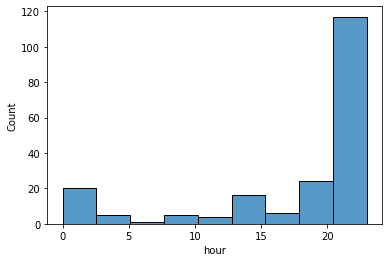

In [136]:
sns.histplot(df["hour"])

Answer : Most people submit the assignment in the late evening (i.e. after 8 PM)